# Revised Project Proposal

---
Students: 

- Tailine, DC427182
- Zhong Wanyi, DC229805

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data
crime_dataset = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
crime_dataset.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
# check dataset years
crime_dataset['year'] = pd.DatetimeIndex(crime_dataset['DATE OCC']).year
crime_dataset['year'].value_counts().sort_index()

year
2020    199787
2021    209805
2022    235152
2023    232130
2024    105764
Name: count, dtype: int64

In [4]:
# cleaning data
crimes = crime_dataset[crime_dataset['Vict Age'] > 0]
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,year
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,2020
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,2020
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,2020
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,2020
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463,2020


In [ ]:
# dataset variables
crimes.columns

In [5]:
# filtering the data to answer research question
# crm cd desc == criminal homocide

# Create a binary variables
crimes['Is Homicide'] = crimes['Crm Cd Desc'].apply(lambda x: 1 if x == 'CRIMINAL HOMICIDE' else 0)
crimes = crimes[crimes["Vict Sex"].isin(["M", "F"])]
crimes['Vict Sex Encoded'] = crimes['Vict Sex'].apply(lambda x: 1 if x == 'M' else 0)

crimes['Is Homicide'].value_counts()

C:\Users\86137\AppData\Local\Temp\ipykernel_20492\1282122876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes['Is Homicide'] = crimes['Crm Cd Desc'].apply(lambda x: 1 if x == 'CRIMINAL HOMICIDE' else 0)


Is Homicide
0    711186
1      1538
Name: count, dtype: int64

In [6]:
homicides = crimes[crimes['Is Homicide'] == 1]
homicides.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,year,Is Homicide,Vict Sex Encoded
5002,200100785,05/16/2020 12:00:00 AM,05/15/2020 12:00:00 AM,1945,1,Central,142,1,110,CRIMINAL HOMICIDE,...,NaN,NaN,NaN,300 S OLIVE ST,NaN,34.0523,-118.2502,2020,1,1
6508,201314412,07/24/2020 12:00:00 AM,07/23/2020 12:00:00 AM,2145,13,Newton,1367,1,110,CRIMINAL HOMICIDE,...,998.0,NaN,NaN,1700 E 52ND ST,NaN,33.9954,-118.2432,2020,1,1
7834,201214818,06/17/2020 12:00:00 AM,06/17/2020 12:00:00 AM,50,12,77th Street,1266,1,110,CRIMINAL HOMICIDE,...,998.0,NaN,NaN,500 W 81ST ST,NaN,33.9655,-118.2827,2020,1,1
7882,201113525,09/12/2020 12:00:00 AM,09/12/2020 12:00:00 AM,1200,11,Northeast,1137,1,110,CRIMINAL HOMICIDE,...,998.0,NaN,NaN,600 N AVENUE 50,NaN,34.1109,-118.2016,2020,1,1
8416,201319978,11/15/2020 12:00:00 AM,11/15/2020 12:00:00 AM,150,13,Newton,1331,1,110,CRIMINAL HOMICIDE,...,NaN,NaN,NaN,3100 S HILL ST,NaN,34.0211,-118.2740,2020,1,0


In [7]:
homicides['Vict Age'].value_counts().sort_index()

Vict Age
2     1
3     2
4     2
5     1
6     3
     ..
81    1
82    1
85    1
87    2
99    2
Name: count, Length: 81, dtype: int64

In [8]:
homicides['Vict Age'].describe()

count    1538.000000
mean       37.368661
std        14.701674
min         2.000000
25%        27.000000
50%        34.500000
75%        46.000000
max        99.000000
Name: Vict Age, dtype: float64

In [9]:
labels=["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins=[0, 17, 25, 34, 44, 54, 64, np.inf]

homicides["victim_ages"] = pd.cut(homicides["Vict Age"], labels= labels, bins = bins)
homicides[["Vict Age", "victim_ages"]].head()

C:\Users\86137\AppData\Local\Temp\ipykernel_20492\616386763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides["victim_ages"] = pd.cut(homicides["Vict Age"], labels= labels, bins = bins)


,Vict Age,victim_ages
5002,57,55-64
6508,31,26-34
7834,19,18-25
7882,37,35-44
8416,30,26-34


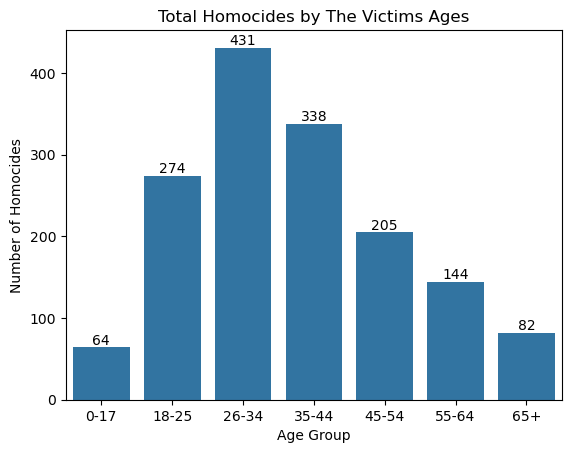

In [10]:
# age distribution of the victims
ax = sns.countplot(data=homicides, x="victim_ages")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title('Total Homocides by The Victims Ages')
plt.xlabel('Age Group')
plt.ylabel('Number of Homocides')
plt.show()

In [11]:
homicides["Vict Sex"].value_counts()

Vict Sex
M    1332
F     206
Name: count, dtype: int64

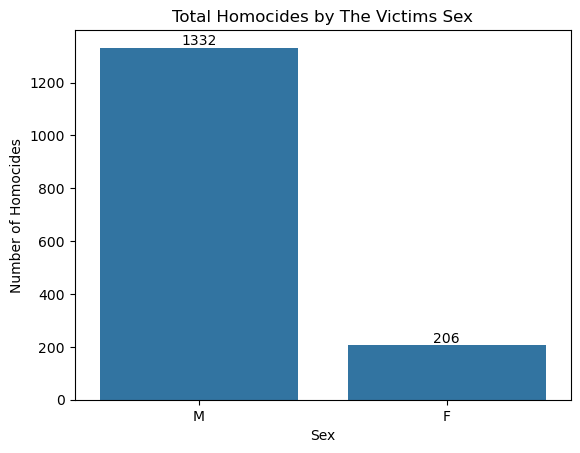

In [12]:
# gender distribution of the victims
ax = sns.countplot(data=homicides, x="Vict Sex")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title('Total Homocides by The Victims Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Homocides')
plt.show()

In [13]:
# mean age of the victims
overall_mean = homicides['Vict Age'].mean()
mean_victim_ages_by_gender = homicides.groupby(['Crm Cd Desc', 'Vict Sex'])['Vict Age'].mean().reset_index()

mean_victim_ages_by_gender['Overall Mean Victim Age'] = overall_mean

print(mean_victim_ages_by_gender.sort_values(by=['Crm Cd Desc', 'Vict Sex']).to_markdown(index=False))

| Crm Cd Desc       | Vict Sex   |   Vict Age |   Overall Mean Victim Age |
|:------------------|:-----------|-----------:|--------------------------:|
| CRIMINAL HOMICIDE | F          |    38.7379 |                   37.3687 |
| CRIMINAL HOMICIDE | M          |    37.1569 |                   37.3687 |


In [14]:
# median age of the victims
overall_median = homicides['Vict Age'].median()
median_victim_ages_by_gender = homicides.groupby(['Crm Cd Desc', 'Vict Sex'])['Vict Age'].median().reset_index()

median_victim_ages_by_gender['Overall Median Victim Age'] = overall_median

print(median_victim_ages_by_gender.sort_values(by=['Crm Cd Desc', 'Vict Sex']).to_markdown(index=False))

| Crm Cd Desc       | Vict Sex   |   Vict Age |   Overall Median Victim Age |
|:------------------|:-----------|-----------:|----------------------------:|
| CRIMINAL HOMICIDE | F          |         35 |                        34.5 |
| CRIMINAL HOMICIDE | M          |         34 |                        34.5 |


In [15]:
# correlation between the crime being a homicide and the age of the victims
correlation_age = crimes['Is Homicide'].corr(crimes['Vict Age'])
print(f"Correlation between crime being a homicide and victim age: {correlation_age}")

Correlation between crime being a homicide and victim age: -0.007096097740188022


In [16]:
# correlation between the crime being a homicide and the gender of the victims
correlation_gender = crimes['Is Homicide'].corr(crimes['Vict Sex Encoded'])
print(f"Correlation between crime being a homicide and victim gender: {correlation_gender}")

Correlation between crime being a homicide and victim gender: 0.03307853721475881


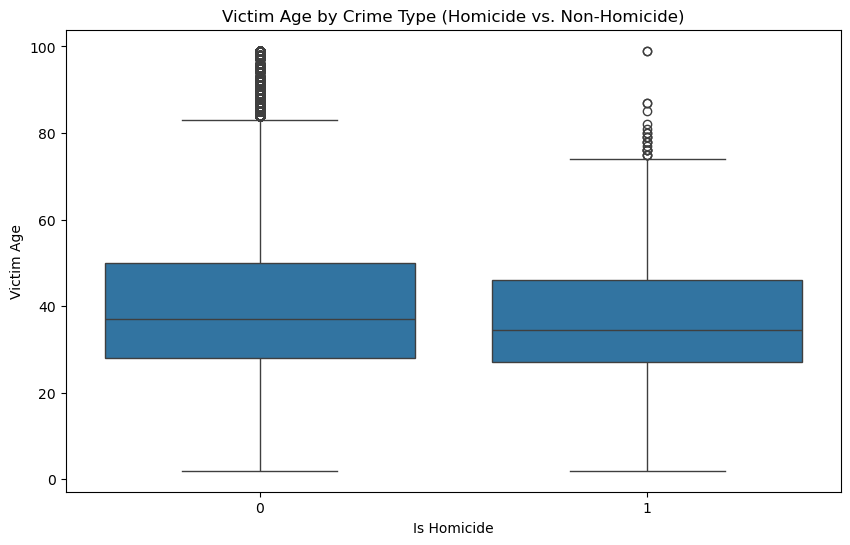

In [17]:
# plotting the relationship between the crime being a homicide and the age of the victims
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is Homicide', y='Vict Age', data=crimes)
plt.title('Victim Age by Crime Type (Homicide vs. Non-Homicide)')
plt.xlabel('Is Homicide')
plt.ylabel('Victim Age')
plt.show()

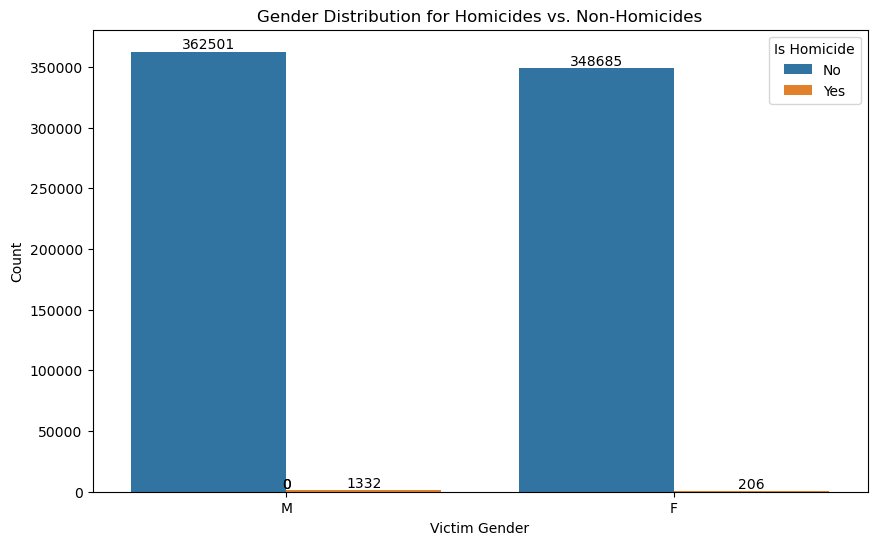

In [18]:
# plotting the relationship between the crime being a homicide and the gender of the victims
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Vict Sex', hue='Is Homicide', data=crimes)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.title('Gender Distribution for Homicides vs. Non-Homicides')
plt.xlabel('Victim Gender')
plt.ylabel('Count')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['No', 'Yes']
plt.legend(handles, labels, title='Is Homicide')
plt.show()

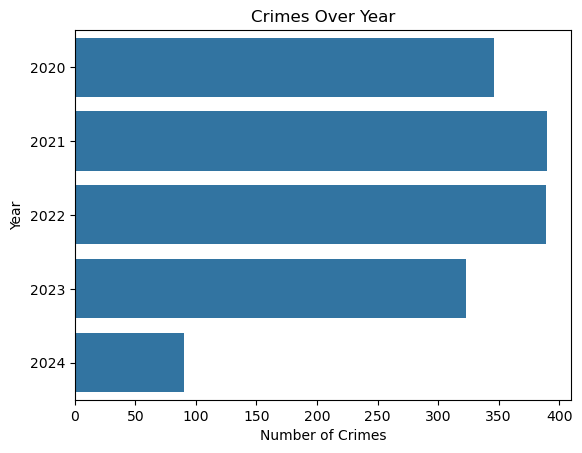

In [21]:
sns.countplot(data=homicides, y="year")
plt.title('Crimes Over Year')
plt.xlabel('Number of Crimes')
plt.ylabel('Year')
plt.show()

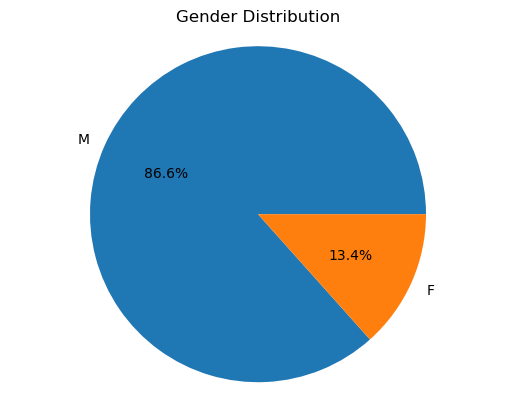

In [23]:
gender_counts = homicides['Vict Sex'].value_counts()

fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
ax.set_title('Gender Distribution')
plt.show()

In [ ]:
# count values of 'weapon description'
pd.set_option('display.max_rows', None)
crimes['Weapon Desc'].value_counts()

In [ ]:
# Create a binary/dummy variables
crimes['VerbalThreat'] = crimes['Weapon Desc'].apply(lambda x: 1 if x == 'VERBAL THREAT' else 0)
crimes['VerbalThreat'].value_counts()

In [ ]:
verbal = crimes[crimes['VerbalThreat'] == 1]
verbal.head()

In [ ]:
verbal['Crm Cd Desc'].value_counts()

In [ ]:
# if the crime has the word "weapon" in the description, it is considered a weapon crime, so we classify it as 0 on the 'VerbalThreat' column of "crimes" dataframe
verbal['Weapon'] = crimes['Crm Cd Desc'].apply(lambda x: 1 if 'WEAPON' in x else 0)

# remove the rows where the crime is a weapon crime
verbal = verbal[verbal['Weapon'] == 0]

In [ ]:
# check the crimes again
verbal['Crm Cd Desc'].value_counts()

In [ ]:
# age distribution of the victims by non-use of strong-arm
plt.figure(figsize=(10, 6))
sns.boxplot(x='VerbalThreat', y='Vict Age', data=crimes)
plt.title('Verbal Threat by The Victims Ages')
plt.xlabel('Number of Crimes')
plt.ylabel('Victim Age')
plt.show()